In [1]:
import os
# Disable oneDNN custom operations to prevent the TensorFlow warning about floating-point round-off errors.
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers
from keras.models import Model
from keras.models import load_model
from stacked_mnist_tf import DataMode, StackedMNISTData
from autoencoder import Autoencoder, plot_comparisons
from variational_autoencoder import VariationalAutoencoder
from verification_net import VerificationNet

In [2]:
batch_size = 2048

In [3]:
gen = StackedMNISTData(mode=DataMode.MONO_BINARY_MISSING, default_batch_size=9)
imgTest, clsTest = gen.get_random_batch(batch_size=8)

img, labels = gen.get_random_batch(training=False, batch_size=batch_size)
print(f"Batch has size: Images: {img.shape}; Labels {labels.shape}")

Batch has size: Images: (2048, 28, 28, 1); Labels (2048,)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Reconstructed images


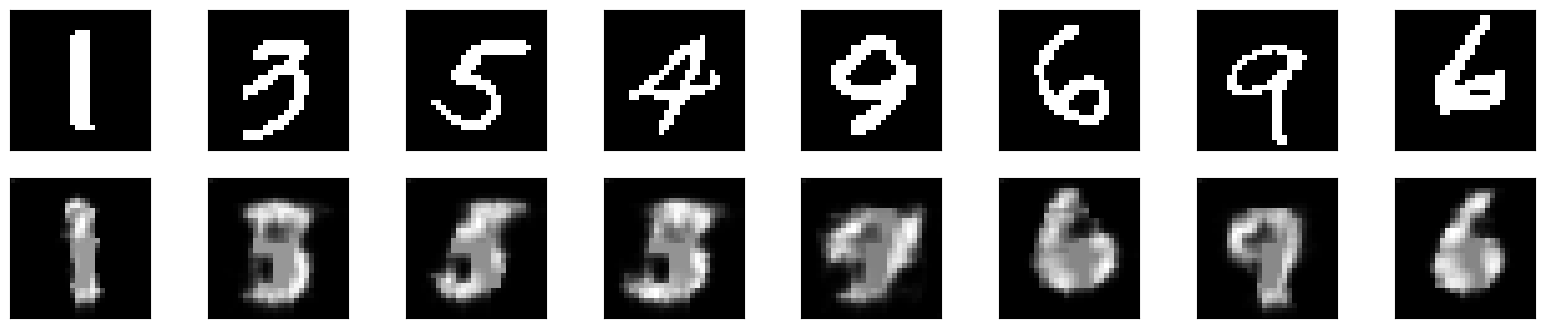

Generated images


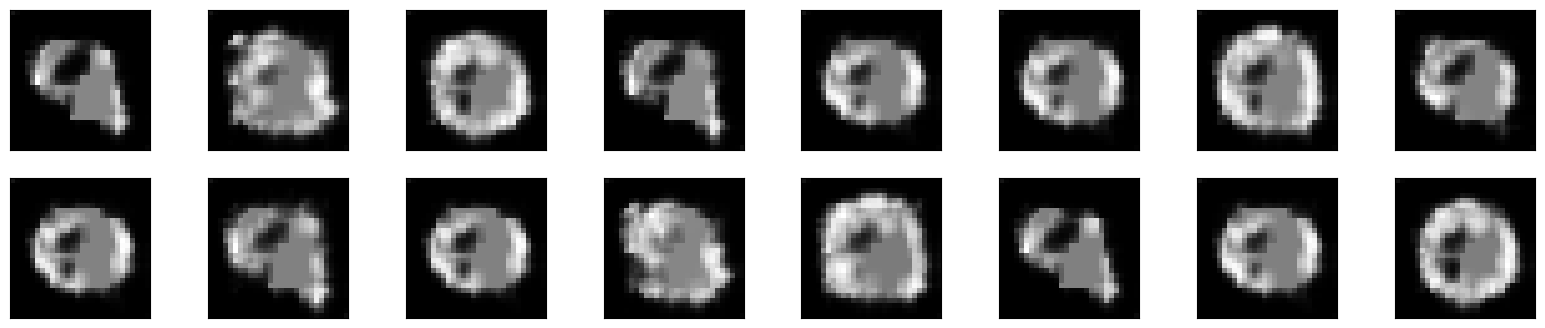

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [4]:
AE = load_model('models/autoencoderMissing.keras', custom_objects={'Autoencoder': Autoencoder})

reconstructed_imgs = AE.predict(imgTest)
generated_imgs1 = AE.generate_images()
generated_imgs2 = AE.generate_images()
print("Reconstructed images")
plot_comparisons(imgTest, reconstructed_imgs)
print("Generated images")
plot_comparisons(generated_imgs1, generated_imgs2)

img_AE_reconstructed = AE.predict(img)
img_AE_generated = AE.generate_images(batch_size)

c:\Projects\.venv\Lib\site-packages\tf_keras\src\saving\serialization_lib.py:159: UserWarning: The object being serialized includes a `lambda`. This is unsafe. In order to reload the object, you will have to pass `safe_mode=False` to the loading function. Please avoid using `lambda` in the future, and use named Python functions instead. This is the `lambda` being serialized:         lambda t: MultivariateNormalTriL.new(t, event_size, validate_args),

  config_arr = [serialize_keras_object(x) for x in obj]
c:\Projects\.venv\Lib\site-packages\tf_keras\src\saving\serialization_lib.py:159: UserWarning: The object being serialized includes a `lambda`. This is unsafe. In order to reload the object, you will have to pass `safe_mode=False` to the loading function. Please avoid using `lambda` in the future, and use named Python functions instead. This is the `lambda` being serialized:         lambda t: IndependentBernoulli.new(  # pylint: disable=g-long-lambda
            t, event_shape, sample

1/1 [==============================] - 6s 6s/step
Reconstructed images


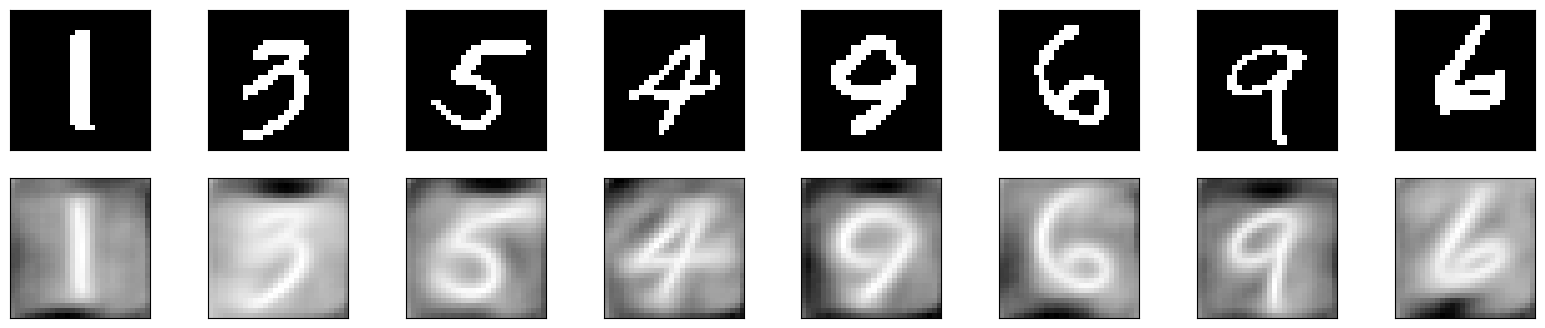

Generated images


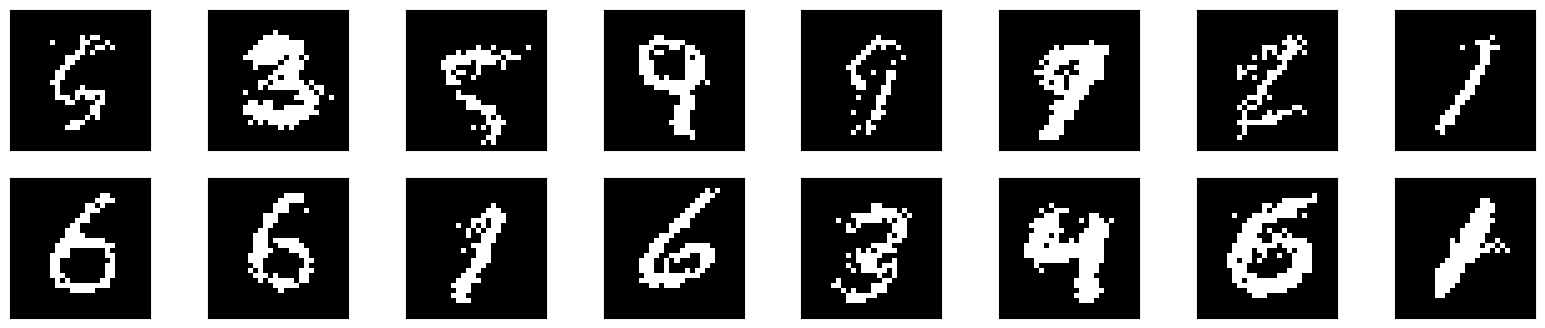

64/64 [==============================] - 3s 45ms/step


In [5]:
VAE = VariationalAutoencoder()
VAE.load_weights('models/variational_autoencoder.keras')

reconstructed_imgs = VAE.predict(imgTest)
generated_imgs1 = VAE.generate_images()
generated_imgs2 = VAE.generate_images()
print("Reconstructed images")
imgTest.shape
plot_comparisons(imgTest, reconstructed_imgs)
print("Generated images")
plot_comparisons(generated_imgs1, generated_imgs2)

img_VAE_reconstructed = VAE.predict(img)
img_VAE_generated = VAE.generate_images(batch_size)

In [6]:
net = VerificationNet(file_name = "C:/Projects/public/DL_Autoencoders/models/net_MONO_BINARY_COMPLETE.weights.h5")
net.load_weights()

print(f'img.shape: {img.shape}')
print(f'label.shape: {labels.shape}')

cov = net.check_class_coverage(data=img, tolerance=0.98)
pred, acc = net.check_predictability(data=img, correct_labels=labels)
print(f"Coverage: {100*cov:.2f}%")
print(f"Predictability: {100*pred:.2f}%")
print(f"Accuracy: {100 * acc:.2f}%")


cov = net.check_class_coverage(data=img_AE_reconstructed, tolerance=0.98)
pred, acc = net.check_predictability(data=img_AE_reconstructed, correct_labels=labels)
print(f"AE Coverage: {100*cov:.2f}%")
print(f"AE Predictability: {100*pred:.2f}%")
print(f"AE Accuracy: {100 * acc:.2f}%")

cov = net.check_class_coverage(data=img_AE_generated, tolerance=0.98)
print(f"AE generated Coverage: {100*cov:.2f}%")

cov = net.check_class_coverage(data=img_VAE_reconstructed, tolerance=0.98)
pred, acc = net.check_predictability(data=img_VAE_reconstructed, correct_labels=labels)
print(f"VAE Coverage: {100*cov:.2f}%")
print(f"VAE Predictability: {100*pred:.2f}%")
print(f"VAE Accuracy: {100 * acc:.2f}%")

cov = net.check_class_coverage(data=img_VAE_generated, tolerance=0.98)
print(f"VAE generated Coverage: {100*cov:.2f}%")

c:\Projects\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
c:\Projects\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


img.shape: (2048, 28, 28, 1)
label.shape: (2048,)
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Coverage: 100.00%
Predictability: 98.68%
Accuracy: 98.39%
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
AE Coverage: 10.00%
AE Predictability: 75.73%
AE Accuracy: 10.99%
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
AE generated Coverage: 10.00%
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
VAE Coverage: 60.00%
VAE Predictability: 98.88%
VAE Accuracy: 17.04%
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
VAE generated Coverage: 100.00%


### AE Anomaly detection

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


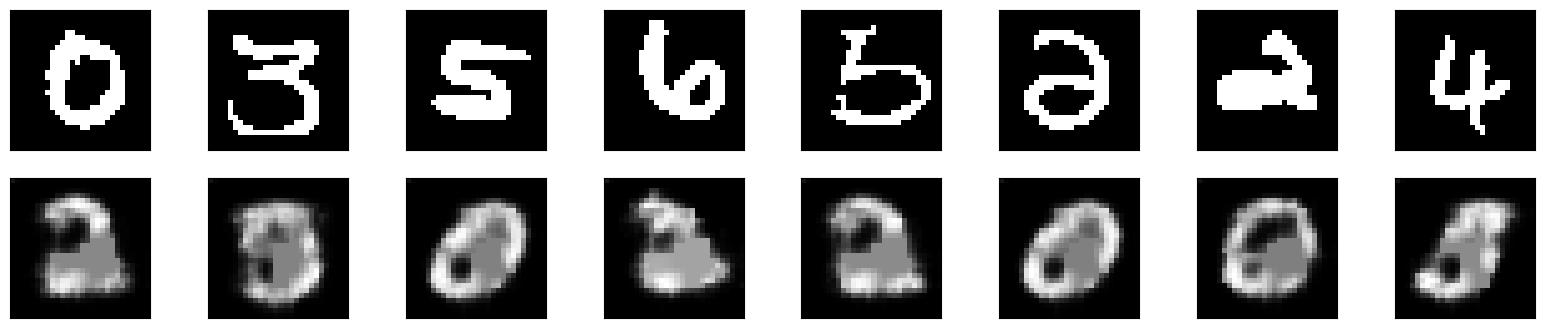

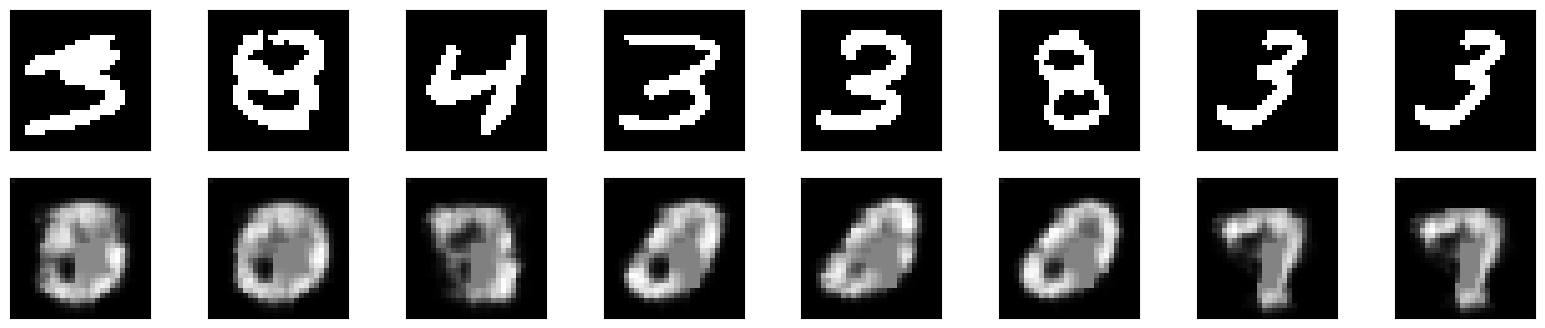

Top  losses: [0.35633975 0.35784265 0.36361718 0.36380896 0.36843202 0.38253585
 0.38476348 0.38625726 0.39881554 0.40384385 0.407413   0.41309902
 0.4304942  0.4626984  0.64103526 0.64103526]


In [7]:
gen = StackedMNISTData(mode=DataMode.MONO_BINARY_COMPLETE, default_batch_size=9)
img, labels = gen.get_random_batch(training=False, batch_size=batch_size)

img_AE_reconstructed = AE.predict(img)
loss_img_AE_reconstructed = tf.keras.losses.binary_crossentropy(img, img_AE_reconstructed).numpy()
loss_img_AE_reconstructed = tf.reduce_mean(loss_img_AE_reconstructed, axis=[1, 2])
losses = np.array(loss_img_AE_reconstructed)
topIndexes = np.argsort(loss_img_AE_reconstructed)[-16:]
plot_comparisons(img[topIndexes[:8]], img_AE_reconstructed[topIndexes[:8]])
plot_comparisons(img[topIndexes[8:]], img_AE_reconstructed[topIndexes[8:]])
print(f"Top  losses: {losses[topIndexes]}")

### VAE Anomaly detection

64/64 [==============================] - 3s 46ms/step


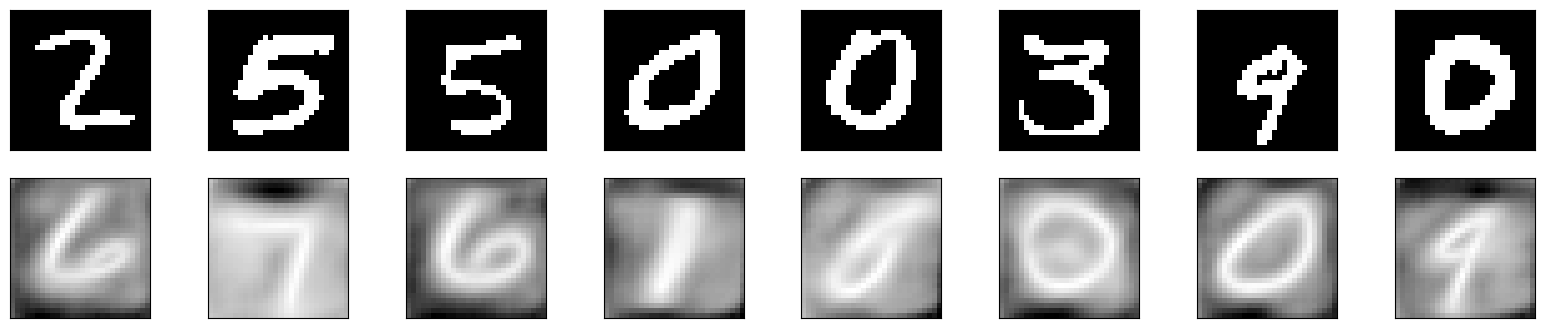

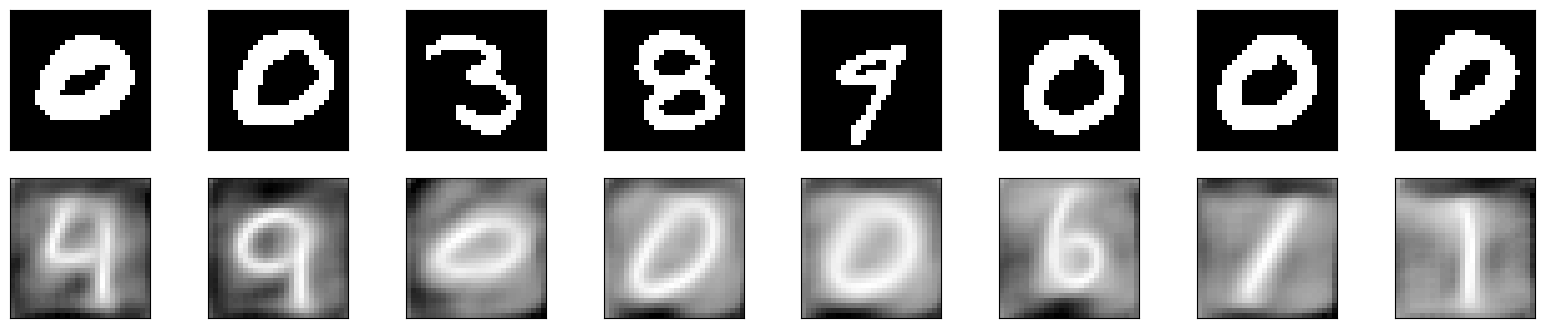

Top  losses: [3.9199328 4.0545306 4.05528   4.061469  4.069381  4.0761666 4.1059403
 4.113806  4.1174197 4.1214147 4.200207  4.2270036 4.264375  4.452558
 4.6049743 4.911679 ]


In [8]:
img_AE_reconstructed = VAE.predict(img)
loss_img_VAE_reconstructed = tf.keras.losses.binary_crossentropy(img, img_VAE_reconstructed).numpy()
loss_img_VAE_reconstructed = tf.reduce_mean(loss_img_VAE_reconstructed, axis=[1, 2])
losses = np.array(loss_img_VAE_reconstructed)
topIndexes = np.argsort(loss_img_VAE_reconstructed)[-16:]
plot_comparisons(img[topIndexes[:8]], img_VAE_reconstructed[topIndexes[:8]])
plot_comparisons(img[topIndexes[8:]], img_VAE_reconstructed[topIndexes[8:]])
print(f"Top  losses: {losses[topIndexes]}")